# 01 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r"C:\Users\miche\DA_Obesity and COVID19\us-states (1).json"

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"C:\Users\miche\DA_Obesity and COVID19\us-states (1).json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [7]:
path = "C:/Users/miche/DA_Obesity and COVID19/02 Data/Prepared Data"

In [8]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, '01.04 Obesity_COVID.csv'))

In [10]:
df.head()

,State,2010 Population,2011 Population,2012 Population,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population,2018 Population,...,2013 Obesity Rate %,2014 Obesity Rate %,2015 Obesity Rate %,2016 Obesity Rate %,2017 Obesity Rate %,2018 Obesity Rate %,2019 Obesity Rate %,2020 Obesity Rate %,2021 Obesity Rate %,2022 Obesity Rate %
0,Alabama,4779736,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,...,32.4,33.5,35.63,35.70,36.33,36.24,36.12,39.01,39.86,36.1
1,Alaska,710231,722128,730443,737068,736283,737498,741456,739700,735139,...,28.4,29.7,29.83,31.39,34.18,29.53,30.50,31.87,33.47,30.5
2,Arizona,6392017,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,...,26.8,28.9,28.42,29.01,29.46,29.49,31.40,30.89,31.31,31.4
3,Arkansas,2915918,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,...,34.6,35.9,34.49,35.68,35.04,37.12,37.41,36.43,38.65,37.4
4,California,37253956,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,...,24.1,24.7,24.18,25.00,25.12,25.83,26.15,30.25,27.58,26.3


In [11]:
df.shape

(51, 38)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        51 non-null     object 
 1   2010 Population              51 non-null     int64  
 2   2011 Population              51 non-null     int64  
 3   2012 Population              51 non-null     int64  
 4   2013 Population              51 non-null     int64  
 5   2014 Population              51 non-null     int64  
 6   2015 Population              51 non-null     int64  
 7   2016 Population              51 non-null     int64  
 8   2017 Population              51 non-null     int64  
 9   2018 Population              51 non-null     int64  
 10  2019 Population              51 non-null     int64  
 11  2020 Population              51 non-null     int64  
 12  2021 Population              51 non-null     int64  
 13  2022 Population       

In [13]:
df.describe()

,2010 Population,2011 Population,2012 Population,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population,2018 Population,2019 Population,...,2013 Obesity Rate %,2014 Obesity Rate %,2015 Obesity Rate %,2016 Obesity Rate %,2017 Obesity Rate %,2018 Obesity Rate %,2019 Obesity Rate %,2020 Obesity Rate %,2021 Obesity Rate %,2022 Obesity Rate %
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.053834e+06,6.108958e+06,6.153549e+06,6.195955e+06,6.241196e+06,6.286964e+06,6.332183e+06,6.372265e+06,6.405637e+06,6.436069e+06,...,28.650980,29.225490,29.277451,29.784118,30.567059,31.295686,31.902353,32.051176,33.343333,32.133333
std,6.823984e+06,6.901810e+06,6.967073e+06,7.029241e+06,7.100271e+06,7.172361e+06,7.235904e+06,7.288670e+06,7.327258e+06,7.360660e+06,...,3.435076,3.416773,3.867844,3.736406,3.870235,3.900315,4.047266,4.099868,4.124261,3.843679
min,5.636260e+05,5.672990e+05,5.763050e+05,5.821220e+05,5.825310e+05,5.856130e+05,5.842150e+05,5.789310e+05,5.776010e+05,5.787590e+05,...,21.300000,21.300000,20.200000,22.270000,22.640000,22.950000,23.770000,24.160000,24.670000,23.800000
25%,1.696962e+06,1.712291e+06,1.724314e+06,1.732560e+06,1.740300e+06,1.746554e+06,1.756702e+06,1.767360e+06,1.777414e+06,1.789606e+06,...,26.350000,27.150000,26.230000,27.210000,27.680000,28.510000,29.175000,28.950000,30.505000,29.350000
50%,4.339367e+06,4.369821e+06,4.386346e+06,4.404659e+06,4.414349e+06,4.425976e+06,4.438182e+06,4.452268e+06,4.461153e+06,4.467673e+06,...,29.400000,29.600000,29.830000,29.920000,31.300000,30.930000,31.880000,31.870000,33.890000,32.300000
75%,6.636084e+06,6.720105e+06,6.780032e+06,6.838650e+06,6.908626e+06,6.996666e+06,7.117922e+06,7.233685e+06,7.340946e+06,7.446805e+06,...,31.050000,31.250000,31.555000,31.980000,33.075000,34.330000,34.800000,35.515000,36.075000,34.800000
max,3.725396e+07,3.763837e+07,3.794880e+07,3.826079e+07,3.859697e+07,3.891804e+07,3.916712e+07,3.935850e+07,3.946159e+07,3.951222e+07,...,35.100000,35.900000,36.200000,37.660000,38.060000,39.530000,40.840000,39.670000,40.570000,40.800000


In [14]:
df.columns

Index(['State', '2010 Population', '2011 Population', '2012 Population ',
       '2013 Population', '2014 Population', '2015 Population',
       '2016 Population', '2017 Population', '2018 Population',
       '2019 Population', '2020 Population', '2021 Population',
       '2022 Population', '2020 COVID19 Deaths', '2020 COVIDLike Deaths',
       '2020 COVID19 Death Rate %', '2020 COVIDLike Death Rate %',
       '2021 COVID19 Deaths', '2021 COVIDLike Deaths',
       '2021 COVID19 Death Rate %', '2021 COVIDLike Death Rate %',
       '2022 COVID19 Deaths ', '2022 COVIDLike Deaths',
       '2022 COVID19 Death Rate %', '2022 COVIDLike Death Rate %',
       '2011 Obesity Rate %', '2012 Obesity Rate %', '2013 Obesity Rate %',
       '2014 Obesity Rate %', '2015 Obesity Rate %', '2016 Obesity Rate %',
       '2017 Obesity Rate %', '2018 Obesity Rate %', '2019 Obesity Rate %',
       '2020 Obesity Rate %', '2021 Obesity Rate %', '2022 Obesity Rate %'],
      dtype='object')

In [15]:
type(df)

pandas.core.frame.DataFrame

# 05 - 06 Data Wrangle / Cleaning
This is my final data set that has been wrangled and cleaned prior to this lesson

### Consistency Checks

In [16]:
#Check for missing values

df.isnull().sum()

State                          0
2010 Population                0
2011 Population                0
2012 Population                0
2013 Population                0
2014 Population                0
2015 Population                0
2016 Population                0
2017 Population                0
2018 Population                0
2019 Population                0
2020 Population                0
2021 Population                0
2022 Population                0
2020 COVID19 Deaths            0
2020 COVIDLike Deaths          0
2020 COVID19 Death Rate %      0
2020 COVIDLike Death Rate %    0
2021 COVID19 Deaths            0
2021 COVIDLike Deaths          0
2021 COVID19 Death Rate %      0
2021 COVIDLike Death Rate %    0
2022 COVID19 Deaths            0
2022 COVIDLike Deaths          0
2022 COVID19 Death Rate %      0
2022 COVIDLike Death Rate %    0
2011 Obesity Rate %            0
2012 Obesity Rate %            0
2013 Obesity Rate %            0
2014 Obesity Rate %            0
2015 Obesi

In [17]:
# duplicates
dups=df.duplicated()
dups.shape

(51,)

<AxesSubplot:xlabel='2020 Obesity Rate %', ylabel='Count'>

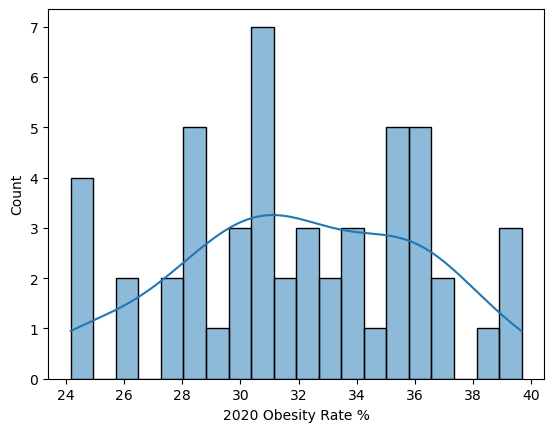

In [19]:
# extreme values
sns.histplot(df['2020 Obesity Rate %'], bins=20, kde=True)

<AxesSubplot:xlabel='2020 COVIDLike Death Rate %', ylabel='Count'>

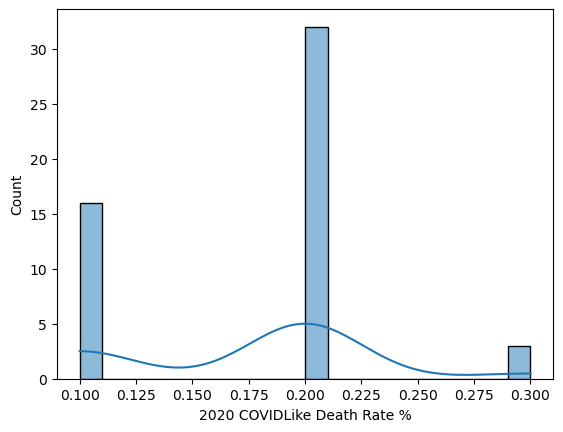

In [20]:
sns.histplot(df['2020 COVIDLike Death Rate %'], bins=20, kde=True)

# 07 Plotting a Choropleth

In [21]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['State','2020 COVIDLike Death Rate %', '2020 Obesity Rate %']]
data_to_plot.head()

,State,2020 COVIDLike Death Rate %,2020 Obesity Rate %
0,Alabama,0.2,39.01
1,Alaska,0.1,31.87
2,Arizona,0.2,30.89
3,Arkansas,0.2,36.43
4,California,0.1,30.25


In [22]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State','2020 COVIDLike Death Rate %', '2020 Obesity Rate %'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'PuBuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [23]:
# save visualization
map.save('plot_data.html')

In [25]:
# plot obesity map
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', '2020 Obesity Rate %'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'RdPu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [26]:
map.save('obesity_plot.html')

# 08 Results Discussion
Does the analysis answer any of your existing research questions?
Does the analysis lead you to any new research questions?

#### The data shows me that the relationship my hypothesis is based on may not be considered a strong correlation. It answers which states have the highest obesity rates and highest COVID-19 death rates. A new research question would consider how state-level COVID-19 guidelines and mitigation efforts affected COVID-19 deaths. 